# Data visualiztion

In [4]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


`ggplot2`

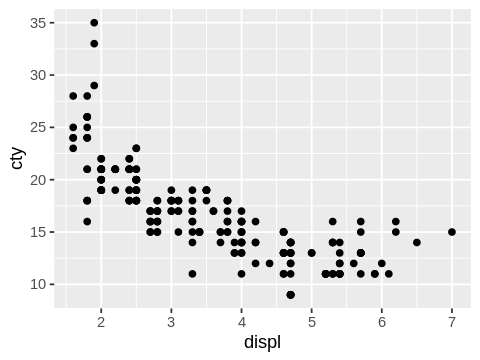

In [7]:
options(repr.plot.width = 4, repr.plot.height = 3)
p = ggplot(mpg, aes(x = displ, y = cty))

p = p + geom_point()

p

# Data split-apply-combine

`dplyr`

- mutate
- summarize
- group_by
- arrange

In [9]:
mpg %>%
    group_by(manufacturer) %>%
    summarize(median.cty = median(cty)) %>%
    print

# A tibble: 15 x 2
   manufacturer median.cty
   <chr>             <dbl>
 1 audi               17.5
 2 chevrolet          15  
 3 dodge              13  
 4 ford               14  
 5 honda              24  
 6 hyundai            18.5
 7 jeep               14  
 8 land rover         11.5
 9 lincoln            11  
10 mercury            13  
11 nissan             19  
12 pontiac            17  
13 subaru             19  
14 toyota             18  
15 volkswagen         21  


# Data I/O

`readr`

- read_csv

In [13]:
col_types = cols(
  year = col_double(),
  name = col_character(),
  country = col_character(),
  time = col_character(),
  race.time = col_double(),
  MF = col_character(),
  country.simple = col_character()
)

read_csv(
    'https://github.com/chuckpr/BIOS512/raw/master/in-class-exercises/data/marathon.csv',
    col_types = col_types
) %>% print

# A tibble: 171 x 7
    year name                 country     time    race.time MF    country.simple
   <dbl> <chr>                <chr>       <chr>       <dbl> <chr> <chr>         
 1  2019 Lawrence Cherono     Kenya       2H 7M …      2.13 Men's Kenya         
 2  2018 Yuki Kawauchi        Japan       2H 15M…      2.27 Men's Japan         
 3  2017 Geoffrey Kirui       Kenya       2H 9M …      2.16 Men's Kenya         
 4  2016 Lemi Berhanu         Ethiopia    2H 12M…      2.21 Men's Ethiopia      
 5  2015 Lelisa Desisa        Ethiopia    2H 9M …      2.15 Men's Ethiopia      
 6  2014 "Mebrahtom \"Meb\" … United Sta… 2H 8M …      2.14 Men's United States 
 7  2013 Lelisa Desisa        Ethiopia    2H 10M…      2.17 Men's Ethiopia      
 8  2012 Wesley Korir         Kenya       2H 12M…      2.21 Men's Kenya         
 9  2011 Geoffrey Mutai       Kenya       2H 3M …      2.05 Men's Kenya         
10  2010 Robert Kiprono Cher… Kenya       2H 5M …      2.10 Men's Kenya         
# … with

# Data ordering

`forcats`

- fct_infreq
- fct_lump
- fct_reorder

In [14]:
read_csv(
    'https://github.com/chuckpr/BIOS512/raw/master/in-class-exercises/data/marathon.csv',
    col_types = col_types
) %>%
    mutate(country = fct_infreq(country) %>% fct_lump(n = 5)) %>%
    .$country %>%
    levels

[1] "United States" "Kenya"         "Canada"        "Ethiopia"     
[5] "Japan"         "Other"

# Data joins and reshaping

`dplyr` and `tidyr`

- left_join
- right_join
- inner_join
- full_join
- gather
- spread

In [16]:
library('nycflights13')

flights %>% print

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# … with 336,766 more rows,

In [17]:
airlines %>% print

# A tibble: 16 x 2
   carrier name                       
   <chr>   <chr>                      
 1 9E      Endeavor Air Inc.          
 2 AA      American Airlines Inc.     
 3 AS      Alaska Airlines Inc.       
 4 B6      JetBlue Airways            
 5 DL      Delta Air Lines Inc.       
 6 EV      ExpressJet Airlines Inc.   
 7 F9      Frontier Airlines Inc.     
 8 FL      AirTran Airways Corporation
 9 HA      Hawaiian Airlines Inc.     
10 MQ      Envoy Air                  
11 OO      SkyWest Airlines Inc.      
12 UA      United Air Lines Inc.      
13 US      US Airways Inc.            
14 VX      Virgin America             
15 WN      Southwest Airlines Co.     
16 YV      Mesa Airlines Inc.         


In [20]:
flights %>%
    select(carrier, year, month, day, dep_time) %>%
    left_join(airlines) %>%
    print

Joining, by = "carrier"


# A tibble: 336,776 x 6
   carrier  year month   day dep_time name                    
   <chr>   <int> <int> <int>    <int> <chr>                   
 1 UA       2013     1     1      517 United Air Lines Inc.   
 2 UA       2013     1     1      533 United Air Lines Inc.   
 3 AA       2013     1     1      542 American Airlines Inc.  
 4 B6       2013     1     1      544 JetBlue Airways         
 5 DL       2013     1     1      554 Delta Air Lines Inc.    
 6 UA       2013     1     1      554 United Air Lines Inc.   
 7 B6       2013     1     1      555 JetBlue Airways         
 8 EV       2013     1     1      557 ExpressJet Airlines Inc.
 9 B6       2013     1     1      557 JetBlue Airways         
10 AA       2013     1     1      558 American Airlines Inc.  
# … with 336,766 more rows


In [26]:
iris %>% 
    as_tibble() %>%
    print

# A tibble: 150 x 5
   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
          <dbl>       <dbl>        <dbl>       <dbl> <fct>  
 1          5.1         3.5          1.4         0.2 setosa 
 2          4.9         3            1.4         0.2 setosa 
 3          4.7         3.2          1.3         0.2 setosa 
 4          4.6         3.1          1.5         0.2 setosa 
 5          5           3.6          1.4         0.2 setosa 
 6          5.4         3.9          1.7         0.4 setosa 
 7          4.6         3.4          1.4         0.3 setosa 
 8          5           3.4          1.5         0.2 setosa 
 9          4.4         2.9          1.4         0.2 setosa 
10          4.9         3.1          1.5         0.1 setosa 
# … with 140 more rows


In [25]:
iris %>%
    as_tibble() %>%
    mutate(row = row_number()) %>%
    gather(key, value, -Species, -row) %>%
    print

# A tibble: 600 x 4
   Species   row key          value
   <fct>   <int> <chr>        <dbl>
 1 setosa      1 Sepal.Length   5.1
 2 setosa      2 Sepal.Length   4.9
 3 setosa      3 Sepal.Length   4.7
 4 setosa      4 Sepal.Length   4.6
 5 setosa      5 Sepal.Length   5  
 6 setosa      6 Sepal.Length   5.4
 7 setosa      7 Sepal.Length   4.6
 8 setosa      8 Sepal.Length   5  
 9 setosa      9 Sepal.Length   4.4
10 setosa     10 Sepal.Length   4.9
# … with 590 more rows


In [27]:
iris %>%
    as_tibble() %>%
    mutate(row = row_number()) %>%
    gather(key, value, -Species, -row) %>%
    spread(key, value) %>%
    print

# A tibble: 150 x 6
   Species   row Petal.Length Petal.Width Sepal.Length Sepal.Width
   <fct>   <int>        <dbl>       <dbl>        <dbl>       <dbl>
 1 setosa      1          1.4         0.2          5.1         3.5
 2 setosa      2          1.4         0.2          4.9         3  
 3 setosa      3          1.3         0.2          4.7         3.2
 4 setosa      4          1.5         0.2          4.6         3.1
 5 setosa      5          1.4         0.2          5           3.6
 6 setosa      6          1.7         0.4          5.4         3.9
 7 setosa      7          1.4         0.3          4.6         3.4
 8 setosa      8          1.5         0.2          5           3.4
 9 setosa      9          1.4         0.2          4.4         2.9
10 setosa     10          1.5         0.1          4.9         3.1
# … with 140 more rows


# Tidy data

From "R for Data Science"
1. Each variable must have its own column.
1. Each observation must have its own row.
1. Each value must have its own cell.

In [37]:
table1 %>% print

# A tibble: 6 x 4
  country      year  cases population
  <chr>       <int>  <int>      <int>
1 Afghanistan  1999    745   19987071
2 Afghanistan  2000   2666   20595360
3 Brazil       1999  37737  172006362
4 Brazil       2000  80488  174504898
5 China        1999 212258 1272915272
6 China        2000 213766 1280428583


In [36]:
table4a %>% print

# A tibble: 3 x 3
  country     `1999` `2000`
* <chr>        <int>  <int>
1 Afghanistan    745   2666
2 Brazil       37737  80488
3 China       212258 213766


In [38]:
iris %>%
    as_tibble() %>%
    print

# A tibble: 150 x 5
   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
          <dbl>       <dbl>        <dbl>       <dbl> <fct>  
 1          5.1         3.5          1.4         0.2 setosa 
 2          4.9         3            1.4         0.2 setosa 
 3          4.7         3.2          1.3         0.2 setosa 
 4          4.6         3.1          1.5         0.2 setosa 
 5          5           3.6          1.4         0.2 setosa 
 6          5.4         3.9          1.7         0.4 setosa 
 7          4.6         3.4          1.4         0.3 setosa 
 8          5           3.4          1.5         0.2 setosa 
 9          4.4         2.9          1.4         0.2 setosa 
10          4.9         3.1          1.5         0.1 setosa 
# … with 140 more rows
